In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import datetime

In [2]:
tf.random.set_seed(42)
np.random.seed(42)

In [3]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

## Data

In [4]:
import tensorflow as tf

# Load Data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Normalize
x_train, x_test = x_train / 255.0, x_test / 255.0

# Labels to one hot
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

## Sample images

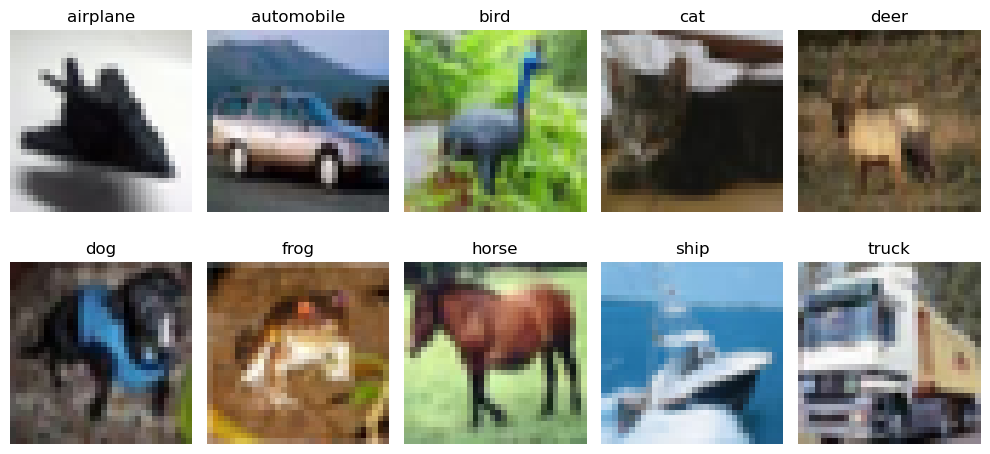

In [5]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

indices = []
for i in range(10):  # Jest 10 klas
    for j in range(len(y_train)):
        if np.argmax(y_train[j]) == i:
            indices.append(j)
            break

plt.figure(figsize=(10, 5))

for i, idx in enumerate(indices):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[idx])
    plt.title(class_names[i])
    plt.axis('off')

plt.tight_layout()
plt.show()

## Dataset

In [6]:
# Dataset objects
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).shuffle(10000).batch(32).prefetch(tf.data.experimental.AUTOTUNE)
test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(32).prefetch(tf.data.experimental.AUTOTUNE)

## Model

In [7]:
from tensorflow.keras import layers, regularizers

model_improved = tf.keras.Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3), padding='same', kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    
    layers.Conv2D(128, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.Conv2D(128, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    
    layers.Conv2D(256, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.Conv2D(256, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Flatten(),
    layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)),  
    layers.Dropout(0.5),
    layers.BatchNormalization(),
    layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

model_improved.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])

model_improved.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 64)       256       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                        

In [8]:
# Callbacks
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

checkpoint_cb = ModelCheckpoint(
    'model_v3',
    save_best_only=True,
    monitor='val_loss',
    mode='min'
)

callbacks_improved = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=0.0001), # Learning rate regularizaion 
    checkpoint_cb
]

# Trenowanie ulepszonego modelu
history_model_improved = model_improved.fit(train_dataset,
                                            epochs=30,
                                            validation_data=test_dataset,
                                            callbacks=callbacks_improved)

Epoch 1/30
1563/1563 [==============================] - ETA: 0s - loss: 3.2417 - accuracy: 0.4043

INFO:tensorflow:Assets written to: model_v3\assets


INFO:tensorflow:Assets written to: model_v3\assets


1563/1563 [==============================] - 39s 22ms/step - loss: 3.2417 - accuracy: 0.4043 - val_loss: 2.5962 - val_accuracy: 0.4876 - lr: 0.0010
Epoch 2/30
1563/1563 [==============================] - 31s 20ms/step - loss: 2.1857 - accuracy: 0.5821 - val_loss: 2.6749 - val_accuracy: 0.4535 - lr: 0.0010
Epoch 3/30
1563/1563 [==============================] - 30s 19ms/step - loss: 2.1043 - accuracy: 0.6302 - val_loss: 3.6065 - val_accuracy: 0.3403 - lr: 0.0010
Epoch 4/30
1561/1563 [============================>.] - ETA: 0s - loss: 1.5835 - accuracy: 0.7350

INFO:tensorflow:Assets written to: model_v3\assets


INFO:tensorflow:Assets written to: model_v3\assets


1563/1563 [==============================] - 34s 22ms/step - loss: 1.5836 - accuracy: 0.7349 - val_loss: 1.2822 - val_accuracy: 0.7835 - lr: 2.0000e-04
Epoch 5/30
1560/1563 [============================>.] - ETA: 0s - loss: 1.2468 - accuracy: 0.7728

INFO:tensorflow:Assets written to: model_v3\assets


INFO:tensorflow:Assets written to: model_v3\assets


1563/1563 [==============================] - 34s 22ms/step - loss: 1.2465 - accuracy: 0.7729 - val_loss: 1.1659 - val_accuracy: 0.7857 - lr: 2.0000e-04
Epoch 6/30
1562/1563 [============================>.] - ETA: 0s - loss: 1.0963 - accuracy: 0.8005

INFO:tensorflow:Assets written to: model_v3\assets


INFO:tensorflow:Assets written to: model_v3\assets


1563/1563 [==============================] - 34s 22ms/step - loss: 1.0963 - accuracy: 0.8005 - val_loss: 1.0334 - val_accuracy: 0.8156 - lr: 2.0000e-04
Epoch 7/30
1560/1563 [============================>.] - ETA: 0s - loss: 1.0208 - accuracy: 0.8181

INFO:tensorflow:Assets written to: model_v3\assets


INFO:tensorflow:Assets written to: model_v3\assets


1563/1563 [==============================] - 34s 22ms/step - loss: 1.0210 - accuracy: 0.8180 - val_loss: 1.0134 - val_accuracy: 0.8177 - lr: 2.0000e-04
Epoch 8/30
1563/1563 [==============================] - 31s 20ms/step - loss: 0.9815 - accuracy: 0.8310 - val_loss: 1.0179 - val_accuracy: 0.8232 - lr: 2.0000e-04
Epoch 9/30
1561/1563 [============================>.] - ETA: 0s - loss: 0.9477 - accuracy: 0.8472

INFO:tensorflow:Assets written to: model_v3\assets


INFO:tensorflow:Assets written to: model_v3\assets


1563/1563 [==============================] - 34s 22ms/step - loss: 0.9477 - accuracy: 0.8472 - val_loss: 0.9600 - val_accuracy: 0.8379 - lr: 2.0000e-04
Epoch 10/30
1563/1563 [==============================] - 30s 19ms/step - loss: 0.9227 - accuracy: 0.8594 - val_loss: 0.9667 - val_accuracy: 0.8477 - lr: 2.0000e-04
Epoch 11/30
1563/1563 [==============================] - 30s 19ms/step - loss: 0.9139 - accuracy: 0.8638 - val_loss: 0.9907 - val_accuracy: 0.8418 - lr: 2.0000e-04
Epoch 12/30
1561/1563 [============================>.] - ETA: 0s - loss: 0.8031 - accuracy: 0.8964

INFO:tensorflow:Assets written to: model_v3\assets


INFO:tensorflow:Assets written to: model_v3\assets


1563/1563 [==============================] - 34s 22ms/step - loss: 0.8031 - accuracy: 0.8964 - val_loss: 0.8887 - val_accuracy: 0.8644 - lr: 1.0000e-04
Epoch 13/30
1562/1563 [============================>.] - ETA: 0s - loss: 0.7235 - accuracy: 0.9111

INFO:tensorflow:Assets written to: model_v3\assets


INFO:tensorflow:Assets written to: model_v3\assets


1563/1563 [==============================] - 34s 22ms/step - loss: 0.7234 - accuracy: 0.9111 - val_loss: 0.8738 - val_accuracy: 0.8613 - lr: 1.0000e-04
Epoch 14/30
1563/1563 [==============================] - 31s 20ms/step - loss: 0.6796 - accuracy: 0.9190 - val_loss: 0.8796 - val_accuracy: 0.8596 - lr: 1.0000e-04
Epoch 15/30
1563/1563 [==============================] - 30s 19ms/step - loss: 0.6568 - accuracy: 0.9238 - val_loss: 0.8905 - val_accuracy: 0.8593 - lr: 1.0000e-04
Epoch 16/30
1561/1563 [============================>.] - ETA: 0s - loss: 0.6339 - accuracy: 0.9294

INFO:tensorflow:Assets written to: model_v3\assets


INFO:tensorflow:Assets written to: model_v3\assets


1563/1563 [==============================] - 34s 22ms/step - loss: 0.6340 - accuracy: 0.9294 - val_loss: 0.8630 - val_accuracy: 0.8673 - lr: 1.0000e-04
Epoch 17/30
1562/1563 [============================>.] - ETA: 0s - loss: 0.6196 - accuracy: 0.9337

INFO:tensorflow:Assets written to: model_v3\assets


INFO:tensorflow:Assets written to: model_v3\assets


1563/1563 [==============================] - 34s 22ms/step - loss: 0.6195 - accuracy: 0.9337 - val_loss: 0.8538 - val_accuracy: 0.8668 - lr: 1.0000e-04
Epoch 18/30
1563/1563 [==============================] - 31s 19ms/step - loss: 0.6049 - accuracy: 0.9364 - val_loss: 0.8637 - val_accuracy: 0.8648 - lr: 1.0000e-04
Epoch 19/30
1563/1563 [==============================] - 30s 19ms/step - loss: 0.5964 - accuracy: 0.9377 - val_loss: 0.8899 - val_accuracy: 0.8572 - lr: 1.0000e-04
Epoch 20/30
1563/1563 [==============================] - 30s 19ms/step - loss: 0.5890 - accuracy: 0.9412 - val_loss: 0.8873 - val_accuracy: 0.8626 - lr: 1.0000e-04
Epoch 21/30
1563/1563 [==============================] - 30s 19ms/step - loss: 0.5842 - accuracy: 0.9409 - val_loss: 0.8697 - val_accuracy: 0.8654 - lr: 1.0000e-04
Epoch 22/30
1563/1563 [==============================] - 30s 19ms/step - loss: 0.5725 - accuracy: 0.9447 - val_loss: 0.8684 - val_accuracy: 0.8671 - lr: 1.0000e-04


In [9]:
model_improved.evaluate(test_dataset)

313/313 [==============================] - 2s 6ms/step - loss: 0.8538 - accuracy: 0.8668


[0.8537582755088806, 0.8668000102043152]

In [11]:
best_model = tf.keras.models.load_model('model_v3')

In [12]:
best_model.evaluate(test_dataset)

313/313 [==============================] - 2s 6ms/step - loss: 0.8538 - accuracy: 0.8668


[0.8537582755088806, 0.8668000102043152]

In [13]:
def plot_history(history):
    plt.figure(figsize=(14, 5))
    
    # Wykres dokładności
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')
    
    # Wykres straty
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(loc='upper right')
    
    plt.show()

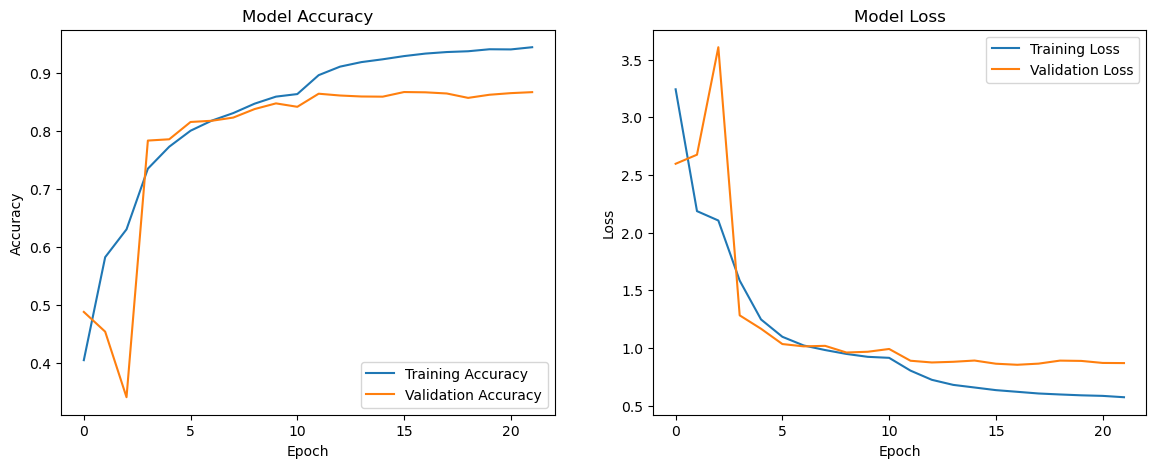

In [14]:
plot_history(history_model_improved)

In [15]:
def display_test_predictions(model, dataset, class_names):
    plt.figure(figsize=(15, 15))
    for images, labels in dataset.take(1):  # Take 1 batch
        predictions = model.predict(images)
        predictions_classes = np.argmax(predictions, axis=1)
        labels = np.argmax(labels, axis=1) 

        random_indices = np.random.choice(images.shape[0], 25, replace=False)

        for i, idx in enumerate(random_indices):
            plt.subplot(5, 5, i + 1)
            plt.xticks([])
            plt.yticks([])
            plt.grid(False)
            plt.imshow(images[idx], cmap=plt.cm.binary)
            plt.xlabel(f"Actual: {class_names[labels[idx]]}\nPredicted: {class_names[predictions_classes[idx]]}")
    plt.show()

1/1 [==============================] - 0s 191ms/step


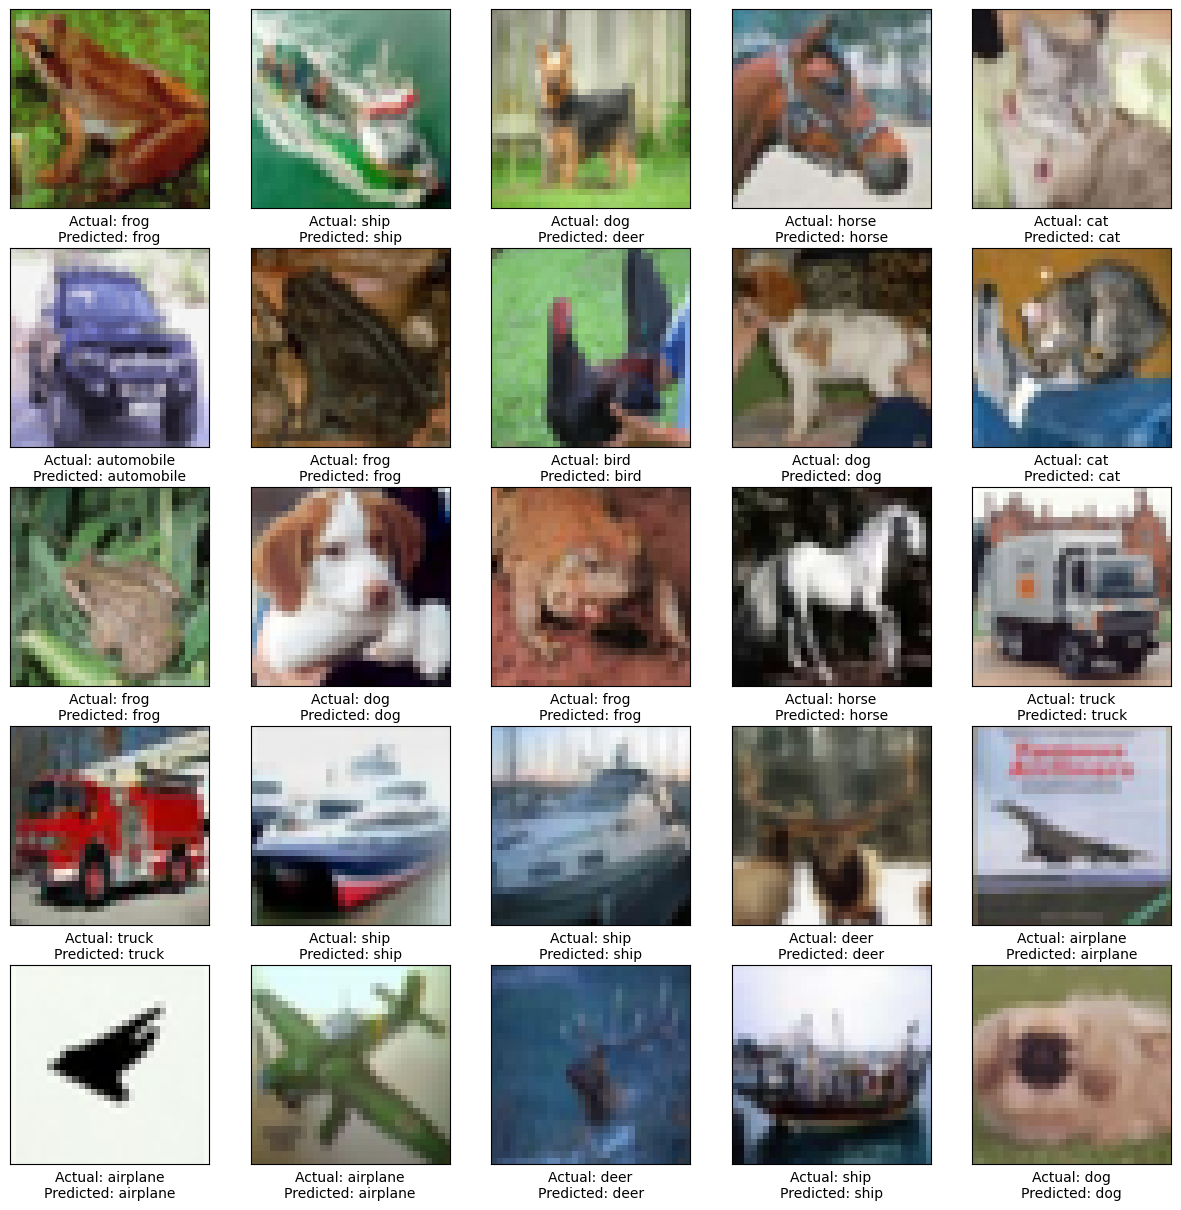

In [16]:
# Wygenerowanie przykładowych predykcji
display_test_predictions(best_model, test_dataset, class_names)

In [17]:
y_pred = np.argmax(best_model.predict(x_test), axis=1)
y_true = np.argmax(y_test, axis=1)

313/313 [==============================] - 2s 5ms/step


In [18]:
# Accuracy for each class
class_accuracies = []
for class_index in range(len(class_names)):
    correct_predictions = np.sum((y_pred == y_true) & (y_true == class_index))
    total_samples = np.sum(y_true == class_index)
    accuracy = correct_predictions / total_samples if total_samples > 0 else 0
    class_accuracies.append((class_names[class_index], accuracy))

# Sorting
sorted_class_accuracies = sorted(class_accuracies, key=lambda x: x[1], reverse=True)

top_5_best_classes = sorted_class_accuracies[:5]
top_5_worst_classes = sorted_class_accuracies[-5:]

print("Top 5 predicted classes:")
for class_name, accuracy in top_5_best_classes:
    print("{}: {:.2f}%".format(class_name, accuracy * 100))

print("\nBottom 5 predicted classes:")
for class_name, accuracy in top_5_worst_classes:
    print("{}: {:.2f}%".format(class_name, accuracy * 100))

Top 5 predicted classes:
ship: 94.70%
truck: 93.90%
automobile: 92.70%
frog: 92.70%
horse: 91.10%

Bottom 5 predicted classes:
airplane: 89.00%
deer: 85.40%
dog: 81.70%
cat: 73.30%
bird: 72.30%


In [19]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_true, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 86.68%


In [20]:
from sklearn.metrics import precision_score

precision = precision_score(y_true, y_pred, average='weighted')
print("Precision: {:.2f}%".format(precision * 100))

Precision: 86.74%


In [21]:
from sklearn.metrics import recall_score

recall = recall_score(y_true, y_pred, average='weighted')
print("Recall: {:.2f}%".format(recall * 100))

Recall: 86.68%


In [22]:
from sklearn.metrics import f1_score

f1 = f1_score(y_true, y_pred, average='weighted')
print("F1-Score: {:.2f}%".format(f1 * 100))

F1-Score: 86.59%


313/313 [==============================] - 2s 4ms/step


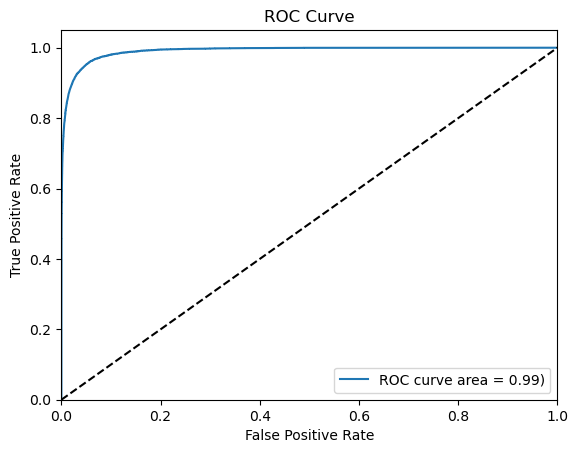

In [23]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

y_test_binarized = label_binarize(y_test, classes=range(len(class_names)))

y_prob = model_improved.predict(x_test)

# TPR, FPR 
fpr, tpr, thresholds = roc_curve(y_test_binarized.ravel(), y_prob.ravel())
roc_auc = auc(fpr, tpr)

# ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve area = {0:0.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--')  # Linia odniesienia
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

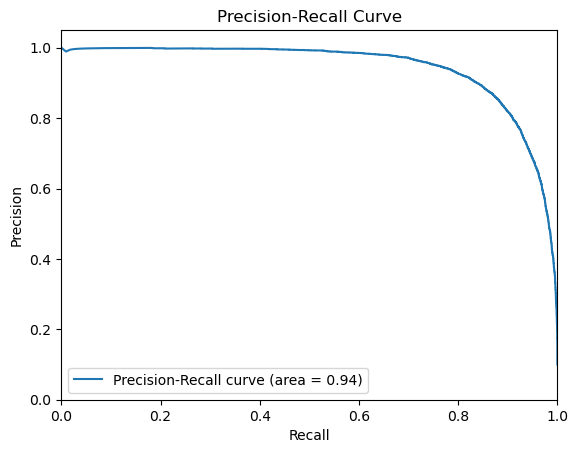

In [24]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# Precision-Recall and mean precision for each class
precision, recall, thresholds = precision_recall_curve(y_test_binarized.ravel(), y_prob.ravel())
average_precision = average_precision_score(y_test_binarized, y_prob, average="macro")

plt.figure()
plt.plot(recall, precision, label='Precision-Recall curve (area = {0:0.2f})'.format(average_precision))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

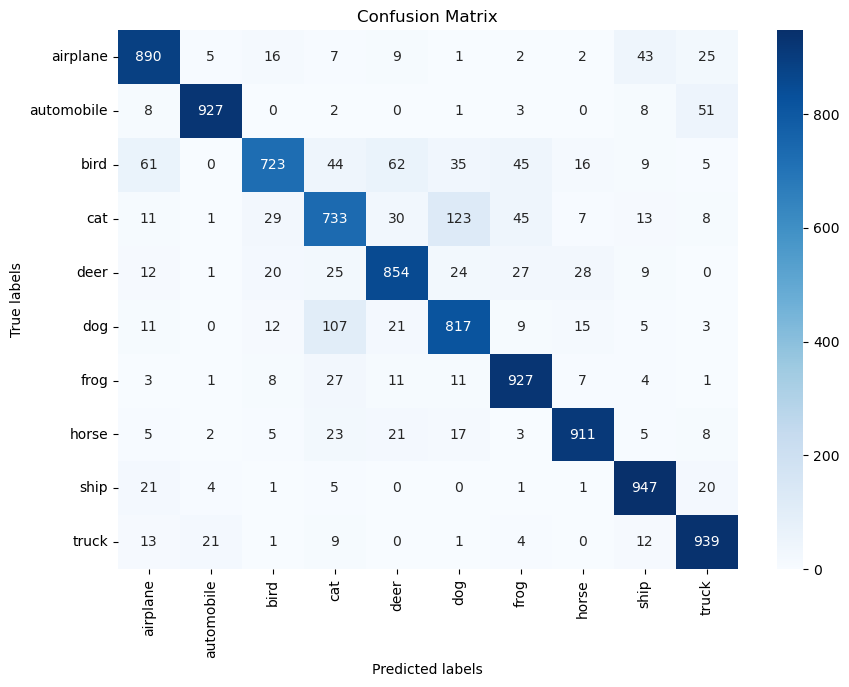

In [25]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Confussion matrix
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(10,7))
sns.heatmap(cm, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names, annot=True)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()